In this notebook we demonstrate how pretraining models in an unsupervised manner can improve the label efficiency of a downstream task, in this case the EuroSAT classification task.

In [43]:
experiments = [
    'scratch',
    'imagenet-ft',
    'imagenet-tl',
    'ssl-ft',
    'ssl-tl'
]

label_ratios = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]

logs_dir = 'logs'

In [44]:
import pandas as pd
import os

data = {}
for name in experiments:
    data[name] = {}
    for label_ratio in label_ratios:
        try:
            dir = f"{logs_dir}/{name}-{label_ratio}"
            versions = sorted(os.listdir(dir))
            latest_version = versions[-1]
            metrics = pd.read_csv(f"{dir}/{latest_version}/metrics.csv")
            last_val_acc = metrics.iloc[-1]['val_acc']
        except Exception as e:
            print(f"Error reading metrics for {name}-{label_ratio}: {e}")
            last_val_acc = 0.0
        data[name][label_ratio] = last_val_acc

# Create DataFrame with proper index
benchmark = pd.DataFrame(data)

benchmark

,scratch,imagenet-ft,imagenet-tl,ssl-ft,ssl-tl
0.01,0.382778,0.742778,0.597778,0.622778,0.571852
0.02,0.553889,0.862778,0.693889,0.697778,0.626852
0.05,0.747778,0.892593,0.750741,0.712222,0.697963
0.10,0.776111,0.923889,0.785741,0.822037,0.732778
0.20,0.711296,0.950000,0.810741,0.871296,0.766111
0.50,0.815926,0.957593,0.851481,0.797407,0.806667
1.00,0.864259,0.960185,0.866481,0.844815,0.822593


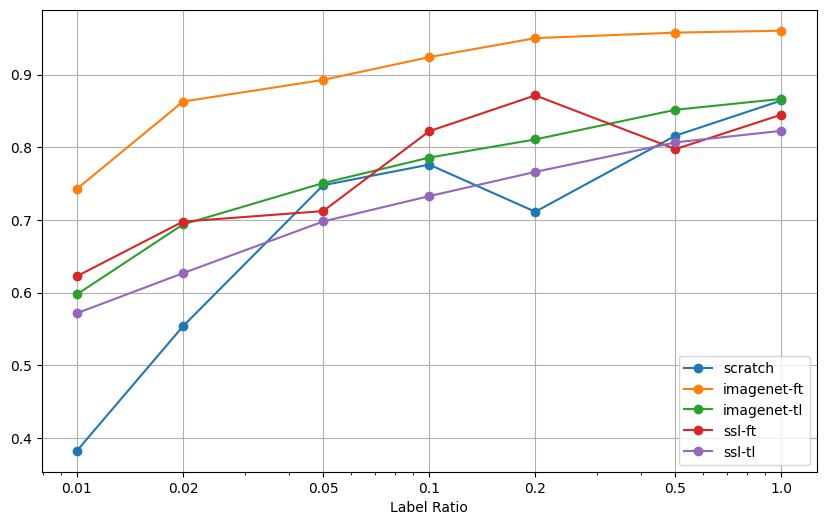

In [45]:
import matplotlib.pyplot as plt

benchmark.plot(kind='line', figsize=(10, 6), marker='o', grid=True)
plt.xscale('log')
plt.xlabel('Label Ratio')
plt.xticks(label_ratios, label_ratios)  
plt.show()
